## 1. 데이터 불러오기

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

# For Google Colab Mounting
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/BOAZ")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

train = pd.read_csv("final.csv")

In [11]:
df = train.drop('Unnamed: 0',axis=1)
df.head()

,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,maxPlace,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,totalDistance,cnt_per_matchid,total_heals,items,headshots_over_kills,killPlace_over_maxPlace,walkDistance_over_heals,workDistance_over_kills,kills_over_match_cnt
0,0,100.000,0,0,45,1,1,58.53,97,0.0,0,0.00,0,49.75,2,0.1875,49.75,97,0,2,0.00,0.463918,0.00000,49.75,0.010309
1,0,8.538,0,0,48,0,0,0.00,96,2004.0,0,0.00,0,1089.00,6,0.7368,3093.00,96,0,6,0.00,0.500000,0.00000,0.00,0.000000
2,1,324.200,1,5,5,4,1,49.83,97,1228.0,0,76.84,0,2050.00,6,0.8750,3354.84,97,6,12,0.25,0.051546,410.00000,512.50,0.041237
3,3,254.300,0,12,13,2,1,36.00,96,2367.0,0,15.29,0,1787.00,3,0.8211,4169.29,96,15,18,0.00,0.135417,148.91667,893.50,0.020833
4,0,136.900,0,0,37,1,1,22.83,96,0.0,0,0.00,0,270.70,1,0.3474,270.70,96,0,1,0.00,0.385417,0.00000,270.70,0.010417


In [7]:
df.shape

(702414, 25)

In [8]:
pd.set_option('display.max_columns', None)

In [25]:
solo_model = df

In [26]:
solo_model.isnull().sum()

boosts                         0
damageDealt                    0
headshotKills                  0
heals                          0
killPlace                      0
kills                          0
killStreaks                    0
longestKill                    0
maxPlace                       0
rideDistance                   0
roadKills                      0
swimDistance                   0
vehicleDestroys                0
walkDistance                   0
weaponsAcquired                0
winPlacePerc                   0
totalDistance                  0
cnt_per_matchid                0
total_heals                    0
items                          0
headshots_over_kills           0
killPlace_over_maxPlace        0
walkDistance_over_heals    16030
workDistance_over_kills        0
kills_over_match_cnt           0
dtype: int64

----------------------------------

## 3. VIF

+ VIF를 하기 전에 파생변수를 사용해서 삭제해도 되는 변수들은 삭제
    - items(heals, boosts, weaponsAcquired)
    - total_heals(heals, boosts) 삭제 (items와 비슷)
    - totalDistance(walkDistance, rideDistance, swimDistance)
    - headshots_over_kills(headshotKills)
    - walkDistacne_over_heals(결측치가 너무 많아서 삭제,, )
    - cnt_per_matchid(비슷한 데이터가 너무 많음)
    - maxPlace

1. 1차 VIF
    + 결과
        - killPlace_over_maxPlace가 뭘 의미하는지 모르겠어서 일단 삭제했습니당ㅇ!!

In [27]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,273.124468,killPlace_over_maxPlace
1,272.317086,killPlace
2,27.210093,kills
3,15.681746,damageDealt
4,10.554190,kills_over_match_cnt
5,5.000202,killStreaks
6,4.167836,items
7,2.802574,totalDistance
8,2.540521,workDistance_over_kills
9,2.345425,longestKill


2. 2차 VIF
    + 결과
        - kills보다 match 내 player수 대비 kill 수를 나타내는 kills_over_match_cnt가 더 유의미한 변수 같아서 kills를 삭제

In [30]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace', 
            'killPlace_over_maxPlace']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,26.906595,kills
1,15.678143,damageDealt
2,10.334635,kills_over_match_cnt
3,4.999928,killStreaks
4,4.163277,items
5,2.801454,totalDistance
6,2.539973,workDistance_over_kills
7,2.345424,longestKill
8,1.488042,headshots_over_kills
9,1.437593,killPlace


3. 3차 VIF
    + 결과
        - 남은 변수('damageDealt','headshotKills', 'killPlace','killStreaks','longestKill','numGroups','roadKills','vehicleDestroys','totalDistance','cnt_per_matchid', 'items','headshots_over_kills','workDistance_over_kills', 'kills_over_match_cnt')

In [32]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'walkDistance', 'rideDistance', 'swimDistance', 'walkDistance_over_heals','headshotKills','maxPlace', 
            'killPlace_over_maxPlace', 'kills']
solo_vif = solo_model.drop(vif_drop, axis = 'columns')

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif.values, i) for i in range(solo_vif.shape[1])]
vif['features'] = solo_vif.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,8.520670,damageDealt
1,6.584556,kills_over_match_cnt
2,4.652389,killStreaks
3,4.153995,items
4,2.800858,totalDistance
5,2.454152,workDistance_over_kills
6,2.263515,longestKill
7,1.487510,headshots_over_kills
8,1.344811,killPlace
9,1.035347,roadKills


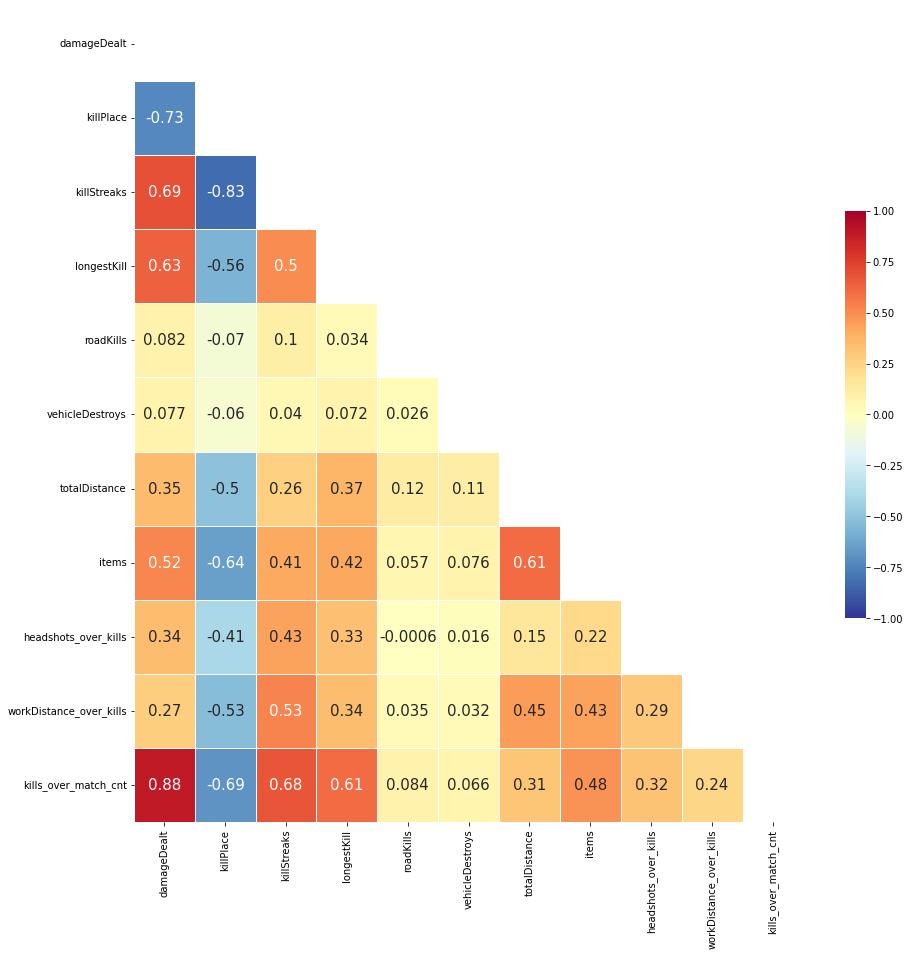

In [34]:
# solo_vif.corr().style.background_gradient().set_properties(**{'font-size': '11pt'})
vif_1 = solo_vif.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(vif_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(vif_1, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,
            annot_kws={"size": 15}# 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 4. OLS(VIF 전 OLS = 0.97, VIF 후 OLS = 0.884)

### VIF 하기 전 OLS 값(0.97,,,?) 

In [40]:
f_y = solo_model['winPlacePerc']
f_X = solo_model.drop('walkDistance_over_heals',axis = 'columns')
f_X = f_X.drop('winPlacePerc',axis = 'columns')

In [41]:
import statsmodels.api as sm

model = sm.OLS(f_y, f_X).fit() #회귀분석 계산
display(model.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          1.071e+06
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                        0.00
Time:                        19:34:50   Log-Likelihood:                      6.1767e+05
No. Observations:              702414   AIC:                                 -1.235e+06
Df Residuals:                  702393   BIC:                                 -1.235e+06
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
boosts                      0.0091   7.39e-05    123.499      0.000       0.009       0.009
damageDealt              9.089e-05    2.4e-06     37.929      0.000    8.62e-05    9.56e-05
headshotKills               0.0465      0.000    107.434      0.000       0.046       0.047
heals                      -0.0081   6.03e-05   -134.614      0.000      -0.008      -0.008
killPlace                  -0.0131   3.97e-05   -329.054      0.000      -0.013      -0.013
kills                      -0.0810      0.000   -212.148      0.000      -0.082      -0.080
killStreaks                -0.2081      0.001   -388.844      0.000      -0.209      -0.207
longestKill             -6.027e-05   3.55e-06    -16.981      0.000   -6.72e-05   -5.33e-05
maxPlace                    0.0180   7.44e-05    242.258      0.000       0.018       0.018
rideDistance                5.5565      7.463      0.745      0.457      -9.071      20.183
roadKills                   0.0458      0.001     33.339      0.000       0.043       0.048
swimDistance                5.5566      7.463      0.745      0.457      -9.070      20.184
vehicleDestroys            -0.0119      0.002     -6.951      0.000      -0.015      -0.009
walkDistance                5.5565      7.463      0.745      0.457      -9.070      20.184
weaponsAcquired             0.0054   4.44e-05    121.984      0.000       0.005       0.006
totalDistance              -5.5565      7.463     -0.745      0.457     -20.183       9.071
cnt_per_matchid            -0.0081   7.57e-05   -107.254      0.000      -0.008      -0.008
total_heals                 0.0010    3.1e-05     32.512      0.000       0.001       0.001
items                       0.0064    2.8e-05    229.218      0.000       0.006       0.006
headshots_over_kills       -0.0806      0.001    -99.788      0.000      -0.082      -0.079
killPlace_over_maxPlace     0.2941      0.003     84.611      0.000       0.287       0.301
workDistance_over_kills  1.669e-05   2.81e-07     59.342      0.000    1.61e-05    1.72e-05
kills_over_match_cnt        3.1701      0.019    163.782      0.000       3.132       3.208
==============================================================================
Omnibus:                   169459.571   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5532889.697
Skew:                           0.494   Prob(JB):                         0.00
Kurtosis:                      16.714   Cond. No.                     1.07e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Er

### VIF 한 후 OLS 값(0.884)

In [42]:
X_OLS = solo_vif
y_OLS = solo_model['winPlacePerc']

In [43]:
import statsmodels.api as sm

model_ols = sm.OLS(y_OLS, X_OLS).fit() #회귀분석 계산
display(model_ols.summary()) #통계량 정리

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          4.871e+05
Date:                Tue, 28 Feb 2023   Prob (F-statistic):                        0.00
Time:                        19:34:59   Log-Likelihood:                      1.4621e+05
No. Observations:              702414   AIC:                                 -2.924e+05
Df Residuals:                  702403   BIC:                                 -2.923e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
damageDealt                 0.0004   3.43e-06    104.575      0.000       0.000       0.000
killPlace                   0.0024   4.98e-06    487.314      0.000       0.002       0.002
killStreaks                 0.1070      0.001    156.913      0.000       0.106       0.108
longestKill              1.818e-05   6.81e-06      2.669      0.008    4.83e-06    3.15e-05
roadKills                  -0.1387      0.003    -51.894      0.000      -0.144      -0.133
vehicleDestroys            -0.0995      0.003    -29.683      0.000      -0.106      -0.093
totalDistance            5.425e-05    1.6e-07    338.371      0.000    5.39e-05    5.46e-05
items                       0.0296   6.25e-05    473.756      0.000       0.029       0.030
headshots_over_kills        0.0200      0.001     20.811      0.000       0.018       0.022
workDistance_over_kills  5.999e-05    4.6e-07    130.448      0.000    5.91e-05    6.09e-05
kills_over_match_cnt       -0.7875      0.029    -26.961      0.000      -0.845      -0.730
==============================================================================
Omnibus:                    20153.366   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51978.166
Skew:                          -0.052   Prob(JB):                         0.00
Kurtosis:                       4.329   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5. Modeling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = solo_vif
y = solo_model['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
print(X_train.shape, X_test.shape)

(561931, 11) (140483, 11)


### 1) Linear Regression

In [46]:
model_lr = LinearRegression(normalize=True, n_jobs=8)
model_lr = model_lr.fit(X_train, y_train)

print("Linear Train Score:", model_lr.score(X_train, y_train))
print("Linear Test Score:", model_lr.score(X_test, y_test))

Linear Train Score: 0.8386565574174648
Linear Test Score: 0.838119999697756


In [47]:
lr_pred = model_lr.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,lr_pred)
print("Linear Regression 모델의 mae 값 : ", mae)

Linear Regression 모델의 mae 값 :  0.0823302273072736


In [49]:
lr_pred

array([0.58822756, 0.46014882, 0.32497594, ..., 0.4465263 , 0.71911806,
       0.37511072])

In [50]:
result = pd.DataFrame({'pred' : lr_pred, 'real' : y_test})

result.head()

,pred,real
21958,0.588228,0.6222
662856,0.460149,0.5161
639729,0.324976,0.3053
610850,0.559757,0.6082
89436,0.078659,0.0417


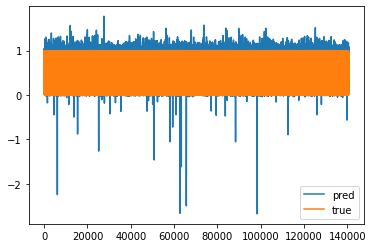

In [51]:
plt.plot(np.array(lr_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.legend()
plt.show()

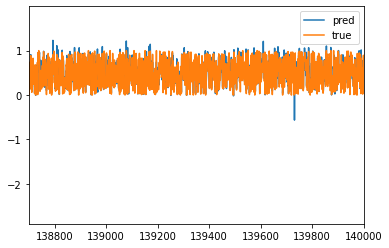

In [52]:
plt.plot(np.array(lr_pred),label = "pred")
plt.plot(np.array(y_test),label = "true")
plt.xlim(138700,140000)
plt.legend()
plt.show()

### 2) Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=10)

forest = model_rf.fit(X_train,y_train)

print("Random Forest Train Score:", forest.score(X_train, y_train))
print("Random Forest Test Score:", forest.score(X_test, y_test))

Random Forest Train Score: 0.9852837655290525
Random Forest Test Score: 0.9206408045304401


In [54]:
# 너무 과적합 같아서 tree의 개수 늘림(https://www.kaggle.com/code/carlolepelaars/pubg-data-exploration-rf-funny-gifs#Final-Random-Forest-Model-)
# 근데 비슷,,,
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=70, min_samples_leaf=3, max_features=0.5, n_jobs=-1)

forest = model_rf.fit(X_train,y_train)

print("Random Forest Train Score:", forest.score(X_train, y_train))
print("Random Forest Test Score:", forest.score(X_test, y_test))

Random Forest Train Score: 0.9682168199186253
Random Forest Test Score: 0.9311660609926987


In [55]:
pred_rf = forest.predict(X_test)

In [56]:
result = pd.DataFrame({'pred' : pred_rf, 'real' : y_test})

result.head()

,pred,real
21958,0.690752,0.6222
662856,0.469227,0.5161
639729,0.326440,0.3053
610850,0.623893,0.6082
89436,0.058956,0.0417


In [57]:
mae = mean_absolute_error(y_test, pred_rf)
print("Random Forest 모델의 mae 값 : ", mae)

Random Forest 모델의 mae 값 :  0.05603737085303345


In [58]:
# 변수 간 중요도
list(forest.feature_importances_)

[0.014153566520649273,
 0.2657267830333784,
 0.001811408167788382,
 0.011175155326153161,
 5.583039440585018e-05,
 2.8827563102134396e-05,
 0.47596938895425517,
 0.1509725914863572,
 0.0009380064016398416,
 0.06494837547906086,
 0.014220066673209714]

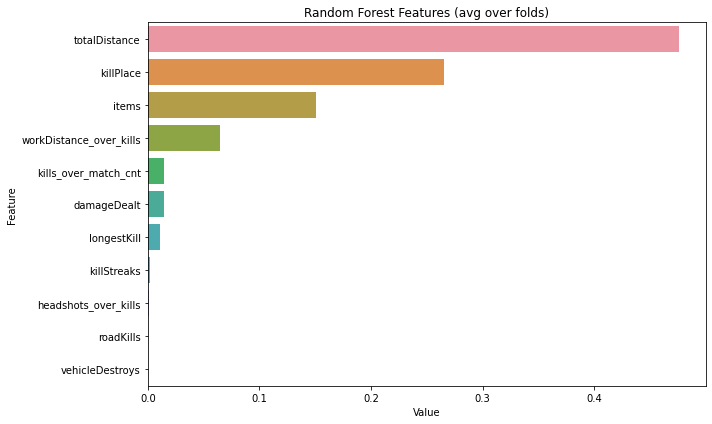

In [59]:
feature_importance = pd.DataFrame(sorted(zip(forest.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('Random Forest Features (avg over folds)')
plt.tight_layout() 

### 2-1) RF gridsearchCV

In [171]:
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [10, 30, 70], 
    'max_features': [2, 4, 6, 8], 
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [2, 6, 10],
    'min_samples_split': [2, 6, 10]
    }

In [172]:
rf_reg_tuned = GridSearchCV(estimator = forest_reg,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

In [174]:
rf_reg_tuned.best_estimator

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

### 3) lightgbm

In [101]:
import lightgbm as lgb
train_lgb = lgb.Dataset(X_train, label = y_train) 
test_lgb = lgb.Dataset(X_test, label = y_test) 

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2020}

model_lgb = lgb.train(params, train_lgb, 1000, test_lgb, verbose_eval=100, early_stopping_rounds=500)
predict_lgb_train = model_lgb.predict(X_train)
predict_lgb_test = model_lgb.predict(X_test)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 561931, number of used features: 14
[LightGBM] [Info] Start training from score 0.497609
Training until validation scores don't improve for 500 rounds
[100]	valid_0's l2: 0.0163578
[200]	valid_0's l2: 0.00655011
[300]	valid_0's l2: 0.00497376
[400]	valid_0's l2: 0.0046121
[500]	valid_0's l2: 0.00448826
[600]	valid_0's l2: 0.00442697
[700]	valid_0's l2: 0.00439459
[800]	valid_0's l2: 0.00437547
[900]	valid_0's l2: 0.00436351
[1000]	valid_0's l2: 0.00435434
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.00435434


In [102]:
pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X_train.columns)))

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [103]:
mae = mean_absolute_error(y_test,predict_lgb_test)
print("lightgbm 모델의 mae 값 : ", mae)

lightgbm 모델의 mae 값 :  0.04695652852942008


In [104]:
from sklearn.metrics import mean_squared_error
import math

print("RMSE: {}".format(math.sqrt(mean_squared_error(predict_lgb_test, y_test)))) # RMSE

RMSE: 0.06598744748443758


In [105]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict_lgb_test)
r2 = r2_score(y_test, predict_lgb_test)

In [106]:
print("mse:", mse)
print("r2: ", r2)

mse: 0.004354343225511407
r2:  0.9489704129292319


In [ ]:
explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

In [ ]:
## https://www.kaggle.com/code/plasticgrammer/pubg-finish-placement-prediction-playground#Predict

### 3-2) lightgbm gridsearhCV

In [150]:
from sklearn.model_selection import GridSearchCV

In [148]:
def find_best_hyperparameters(model):
    # Grid parameters for using in Gridsearch while tuning
    gridParams = {
        'learning_rate'         : [0.1, 0.01 , 0.05],
        'n_estimators '         : [1000, 10000, 20000],
        'bagging_fraction'      : [0.5, 0.6 ,0.7],
        'feature_fraction'      : [0.5, 0.6 ,0.7],
        'num_leaves'            : [31, 80, 140]
    }
    # Create the grid
    grid = GridSearchCV(model, 
                        gridParams,
                        verbose=5,
                        cv=3)
    # Run the grid
    grid.fit(X_train, y_train)
    print('Best parameters: %s' % grid.best_params_)
    print('Accuracy: %.2f' % grid.best_score_)
    return

In [151]:
find_best_hyperparameters(model_lgb)

TypeError: estimator should be an estimator implementing 'fit' method, <lightgbm.basic.Booster object at 0x000001EA76041F88> was passed

------------------------------------------

### 3-3) 다른 lgb모델

In [80]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 1000,
    'learning_rate': 0.1, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model_lgb = LGBMRegressor(**params)
model_lgb = model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae', verbose=100)

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	valid_0's l1: 0.0556872
[200]	valid_0's l1: 0.0551058
[300]	valid_0's l1: 0.0549045
[400]	valid_0's l1: 0.0548148
[500]	valid_0's l1: 0.0547603
[600]	valid_0's l1: 0.0547295
[700]	valid_0's l1: 0.054709
[800]	valid_0's l1: 0.0546738
[900]	valid_0's l1: 0.0546643
[1000]	valid_0's l1: 0.054655


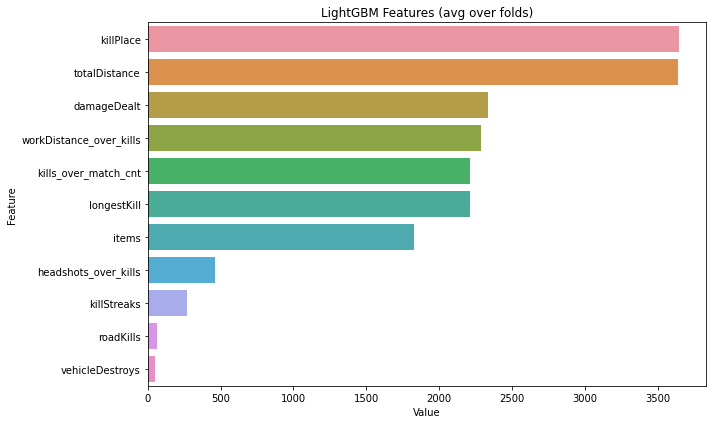

In [81]:
feature_importance = pd.DataFrame(sorted(zip(model_lgb.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout() 

In [82]:
print("lightgbm Train Score:", model_lgb.score(X_train, y_train))
print("lightgbm Test Score:", model_lgb.score(X_test, y_test))

lightgbm Train Score: 0.9381167716747967
lightgbm Test Score: 0.9343756795610244


In [83]:
y_pred = model_lgb.predict(X_test)

In [84]:
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result.head()

,pred,real
21958,0.676091,0.6222
662856,0.490233,0.5161
639729,0.325740,0.3053
610850,0.611959,0.6082
89436,0.053711,0.0417


In [85]:
mae = mean_absolute_error(y_test, y_pred)
print("lightgbm 모델의 mae 값 : ", mae)

lightgbm 모델의 mae 값 :  0.05465501240762358


In [86]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse:", mse)
print("r2: ", r2)

mse: 0.005609325138265135
r2:  0.9343756795610244


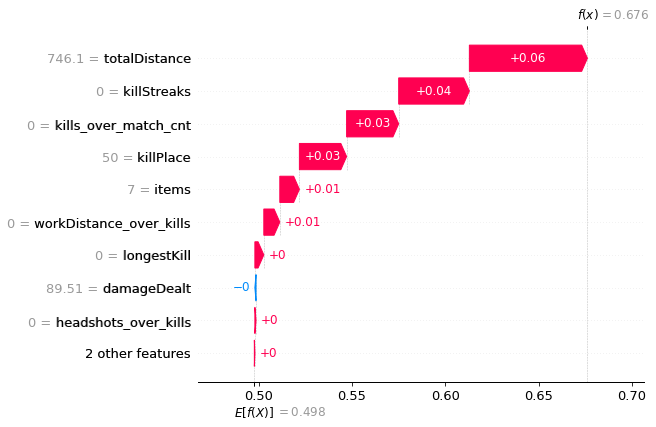

In [87]:
import shap

explainer = shap.Explainer(model_lgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

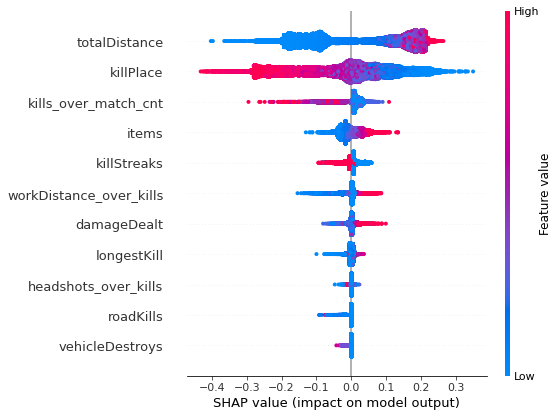

In [88]:
shap.summary_plot(shap_values, X_test)

### 4) XGboost

#### 4-1) totalDistance 삭제

In [89]:
vif_drop = ['winPlacePerc', 'heals', 'boosts', 'weaponsAcquired', 'total_heals', 'cnt_per_matchid',
            'totalDistance', 'walkDistance_over_heals','headshotKills','maxPlace', 
            'killPlace_over_maxPlace', 'kills']
solo_vif_5 = solo_model.drop(vif_drop, axis = 'columns')

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(solo_vif_5.values, i) for i in range(solo_vif_5.shape[1])]
vif['features'] = solo_vif_5.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,8.692121,damageDealt
1,6.604295,kills_over_match_cnt
2,5.053634,walkDistance
3,4.887171,killStreaks
4,4.784653,items
5,3.139978,workDistance_over_kills
6,2.268043,longestKill
7,1.487907,headshots_over_kills
8,1.359797,killPlace
9,1.308628,rideDistance


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_5 = solo_vif_5
y_5 = solo_model['winPlacePerc']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20)

In [91]:
#from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor

xgb_5 = XGBRegressor(max_depth=17, gamma=0.3, learning_rate= 0.1)
xgb_5 = xgb_5.fit(X_train_5,y_train_5)

In [92]:
print("XGboost Train Score:", xgb_5.score(X_train_5, y_train_5))
print("XGboost Test Score:", xgb_5.score(X_test_5, y_test_5))

XGboost Train Score: 0.9378202080855986
XGboost Test Score: 0.936062001103817


In [93]:
y_pred_5 = xgb_5.predict(X_test_5)

In [94]:
mae = mean_absolute_error(y_test, pred_rf)
print("XGboost 모델의 mae 값 : ", mae)

XGboost 모델의 mae 값 :  0.05603737085303345


In [95]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_5)
r2 = r2_score(y_test, y_pred_5)
print("mse:", mse)
print("r2: ", r2)

mse: 0.16467830077527407
r2:  -0.926595680058041


In [76]:
result = pd.DataFrame({'pred' : y_pred_5, 'real' : y_test})

result.head()

,pred,real
21958,0.009685,0.6222
662856,0.507787,0.5161
639729,0.015017,0.3053
610850,0.967998,0.6082
89436,0.311453,0.0417


In [77]:
from xgboost import plot_importance

xgb_5.feature_importances_

#xgb.plot_importance(xgb)

array([1.4364253e-03, 4.7022697e-02, 1.6539073e-02, 1.7818867e-03,
       1.8290383e-03, 1.2203386e-04, 2.1704526e-03, 1.0301654e-03,
       9.1005874e-01, 5.2788621e-03, 5.9560558e-04, 9.3423137e-03,
       2.7926958e-03], dtype=float32)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


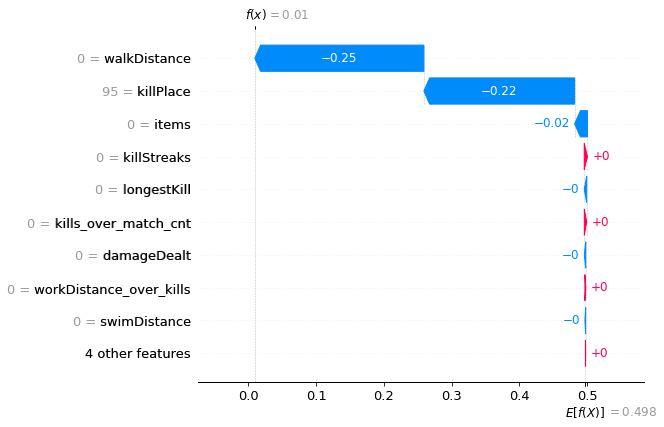

In [78]:
import shap
explainer = shap.Explainer(xgb_5)
shap_values = explainer(X_test_5)

shap.plots.waterfall(shap_values[0])

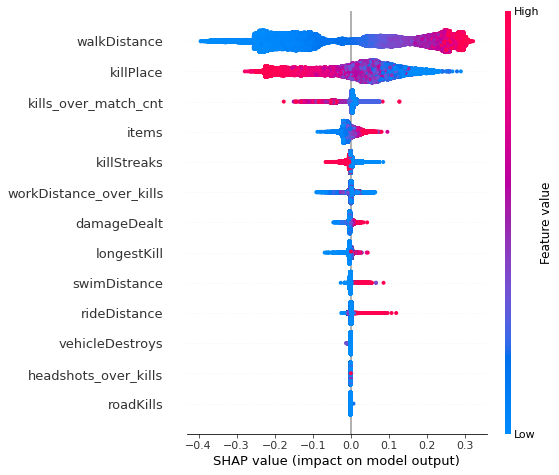

In [79]:
shap.summary_plot(shap_values, X_test_5)

-------------------------

#### 4-2) walkDistance, rideDistance, swimDistance 삭제

In [96]:
#from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor(max_depth=17, gamma=0.3, learning_rate= 0.1)
xgb = xgb.fit(X_train,y_train)

In [97]:
print("XGboost Train Score:", xgb.score(X_train, y_train))
print("XGboost Test Score:", xgb.score(X_test, y_test))

XGboost Train Score: 0.936642416129139
XGboost Test Score: 0.9337619623687946


In [98]:
y_pred = xgb.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test, pred_rf)
print("Random Forest 모델의 mae 값 : ", mae)

Random Forest 모델의 mae 값 :  0.05603737085303345


In [100]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse:", mse)
print("r2: ", r2)

mse: 0.005661783422802515
r2:  0.9337619623687946


In [101]:
from xgboost import plot_importance

xgb.feature_importances_

#xgb.plot_importance(xgb)

array([0.00169593, 0.07322405, 0.01896809, 0.00181876, 0.00163307,
       0.0011156 , 0.8739945 , 0.00811161, 0.00149911, 0.01469267,
       0.00324658], dtype=float32)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


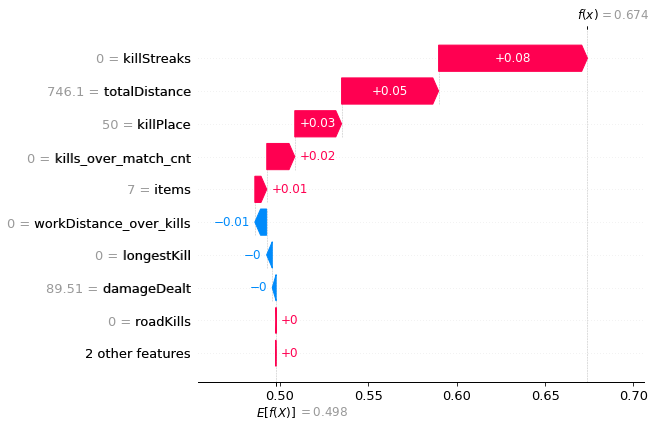

In [102]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.plots.waterfall(shap_values[0])

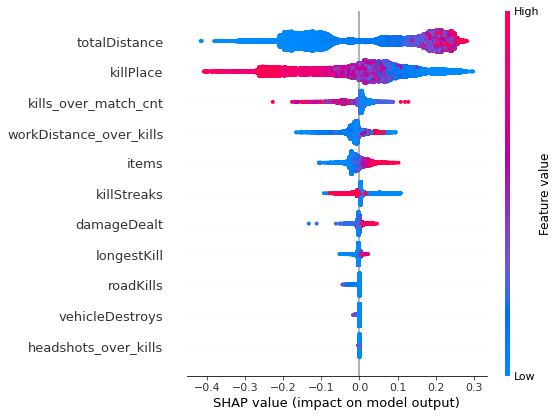

In [103]:
shap.summary_plot(shap_values, X_test)